In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# test1 = pd.read_csv("C:\\Users\\Public\\MACHINE LEARNING\\MLOPS\\ineuron\\mlops\\experiment\\test.csv")
# data = pd.read_csv("C:\\Users\\Public\\MACHINE LEARNING\\MLOPS\\ineuron\\mlops\\experiment\\train.csv")
data = pd.read_csv('/content/train.csv')


In [ ]:
test1.head(3)
print(test1.shape)
print(data.shape)

(129050, 10)
(193573, 11)


In [ ]:
d2.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
data = data.drop('id', axis= 1)

In [ ]:
cat_data = data.columns[data.dtypes=='object']
num_data = data.columns[data.dtypes != 'object']

In [ ]:
for col in cat_data:
    print(data[col].value_counts())

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


In [ ]:
data[num_data].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


<Axes: >

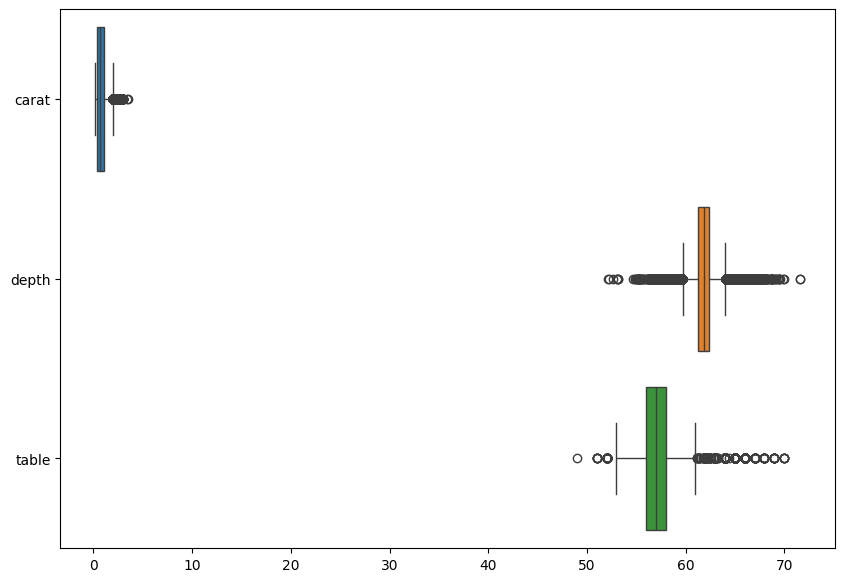

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data= data[['carat','depth','table']], orient='h')

In [ ]:
data['table'].idxmax()

166514

In [ ]:
mean_table = data['table'].mean()
data['table'].iloc[166514] = mean_table
data['table'].iloc[115077] = mean_table

C:\Users\Admin\AppData\Local\Temp\ipykernel_22428\4180934417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['table'].iloc[166514] = mean_table
C:\Users\Admin\AppData\Local\Temp\ipykernel_22428\4180934417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['table'].iloc[115077] = mean_table


In [ ]:
data[cat_data]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# data['cut_encoded'] = lb.fit_transform(data.cut)
# data['color_encoded'] = lb.fit_transform(data.color)
# data['clarity_encoded'] = lb.fit_transform(data.clarity)
# data.drop(['cut','color','clarity'],axis =1, inplace=True)

In [ ]:
data.head(2)

,carat,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,1.52,62.2,58.0,7.27,7.33,4.55,13619,3,2,5
1,2.03,62.0,58.0,8.06,8.12,5.05,13387,4,6,3


<Axes: xlabel='table', ylabel='Count'>

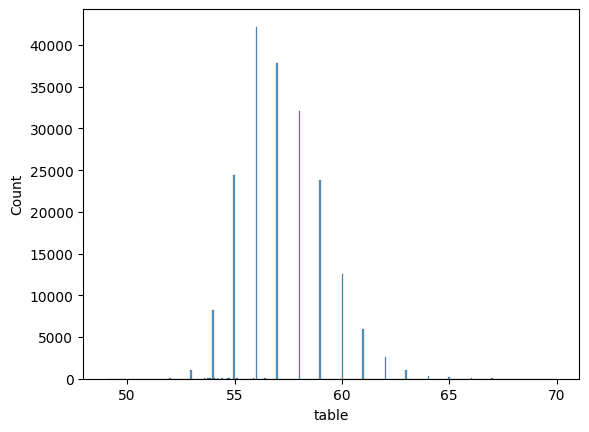

In [ ]:
sns.histplot(data['table'])

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop('price', axis =1)
y = data['price']

In [5]:
X

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...,...
136409,136409,1.22,Very Good,F,VS2,63.3,57.0,6.80,6.84,4.30
136410,136410,0.41,Ideal,E,VS1,61.8,56.0,4.79,4.76,2.95
136411,136411,0.57,Very Good,F,VS1,61.1,58.0,5.32,5.36,3.26
136412,136412,1.00,Premium,D,SI1,61.3,58.0,6.47,6.40,3.94


In [6]:
X.select_dtypes(include='object')

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
136409,Very Good,F,VS2
136410,Ideal,E,VS1
136411,Very Good,F,VS1
136412,Premium,D,SI1


In [7]:
X.select_dtypes(exclude='object')

,id,carat,depth,table,x,y,z
0,0,1.52,62.2,58.0,7.27,7.33,4.55
1,1,2.03,62.0,58.0,8.06,8.12,5.05
2,2,0.70,61.2,57.0,5.69,5.73,3.50
3,3,0.32,61.6,56.0,4.38,4.41,2.71
4,4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...
136409,136409,1.22,63.3,57.0,6.80,6.84,4.30
136410,136410,0.41,61.8,56.0,4.79,4.76,2.95
136411,136411,0.57,61.1,58.0,5.32,5.36,3.26
136412,136412,1.00,61.3,58.0,6.47,6.40,3.94


In [8]:
cat_col = X.select_dtypes(include='object').columns
num_col = X.select_dtypes(exclude='object').columns

In [9]:
print(cat_col)
print(num_col)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [10]:
X['cut'].value_counts()

,count
cut,
Ideal,65290
Premium,35087
Very Good,26447
Good,8211
Fair,1379


In [11]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer()),
                ('scaler',StandardScaler())

                ]

            )

In [13]:
cut_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
                ('scaler',StandardScaler())
                ]
            )

In [14]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [15]:
num_col

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [16]:
from sklearn.compose import ColumnTransformer
preprocessing=ColumnTransformer([
('num_pipeline',num_pipeline,num_col),
('cat_pipeline',cut_pipeline,cat_col)
])

In [17]:
X.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05


In [18]:
preprocessing=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_col),
        ("cat_pipeline",cut_pipeline,cat_col)
    ]
)

##showing standized datafile in pd dataframe style

In [51]:
x_train, x_test , y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state= 42)

In [52]:
preprocessing.fit_transform(x_train)

array([[ 0.13273131, -0.10987577, -0.11078137, ..., -0.13490622,
         0.29815628,  1.34579729],
       [-0.86341625, -0.95233811, -0.57306936, ...,  0.87148181,
         0.29815628,  1.34579729],
       [-0.53676679, -1.0603461 , -0.85044215, ...,  0.87148181,
         0.29815628,  1.34579729],
       ...,
       [ 0.8987389 ,  2.41751123,  0.44396422, ..., -1.14129424,
        -0.31806046, -0.65094258],
       [ 1.61571734,  0.92700095,  0.90625221, ..., -0.13490622,
         0.29815628,  0.01463738],
       [ 1.36247196, -1.0387445 , -0.01832377, ..., -1.14129424,
         0.29815628, -1.31652253]])

In [53]:
preprocessing.transform(x_test)

array([[ 0.07425687, -0.75792372, -1.03535734, ..., -0.13490622,
         0.29815628,  1.34579729],
       [ 1.43579988, -0.19628216,  0.53642182, ..., -1.14129424,
        -0.31806046, -0.65094258],
       [-0.56238586, -0.82272852,  0.25904902, ..., -0.13490622,
        -0.9342772 , -0.65094258],
       ...,
       [-1.26494246, -1.21155729, -0.48061176, ...,  0.87148181,
         1.53058976,  2.01137725],
       [ 0.43665623, -1.0603461 , -0.94289975, ...,  0.87148181,
         0.29815628,  1.34579729],
       [-0.62504974, -0.80112692,  0.90625221, ...,  0.87148181,
        -1.55049395,  1.34579729]])

In [54]:
preprocessing.get_feature_names_out()

array(['num_pipeline__id', 'num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [55]:
X_train = pd.DataFrame(preprocessing.fit_transform(x_train),columns=preprocessing.get_feature_names_out())
X_test = pd.DataFrame(preprocessing.transform(x_test),columns=preprocessing.get_feature_names_out())

In [56]:
X_train.head(2)

,num_pipeline__id,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.132731,-0.109876,-0.110781,0.406889,0.094139,0.045146,0.066848,-0.134906,0.298156,1.345797
1,-0.863416,-0.952338,-0.573069,-0.638868,-1.058529,-1.051412,-1.097975,0.871482,0.298156,1.345797


In [57]:
# from sklearn.preprocessing import StandardScaler
# scl = StandardScaler()
# x_train = scl.fit_transform(x_train)


In [58]:
print(X_train.shape)
print(y_train.shape)

(109131, 10)
(109131,)


In [27]:
X_train

,num_pipeline__id,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.132731,-0.109876,-0.110781,0.406889,0.094139,0.045146,0.066848,-0.134906,0.298156,1.345797
1,-0.863416,-0.952338,-0.573069,-0.638868,-1.058529,-1.051412,-1.097975,0.871482,0.298156,1.345797
2,-0.536767,-1.060346,-0.850442,-0.115990,-1.229628,-1.223598,-1.287258,0.871482,0.298156,1.345797
3,-0.275269,2.611926,0.628879,1.452645,2.084292,2.138575,2.163530,-1.141294,1.530590,0.680217
4,-1.726162,-0.585111,0.443964,-0.115990,-0.500205,-0.534851,-0.486442,0.871482,-0.934277,-0.650943
...,...,...,...,...,...,...,...,...,...,...
109126,1.065656,-0.196282,-0.295697,3.021279,-0.058949,-0.099853,-0.093315,-1.141294,1.530590,-1.316523
109127,1.309685,-0.628314,-1.497645,1.975523,-0.545231,-0.516726,-0.646606,-1.141294,-0.934277,-0.650943
109128,0.898739,2.417511,0.443964,2.498401,1.922198,1.875764,1.945125,-1.141294,-0.318060,-0.650943
109129,1.615717,0.927001,0.906252,0.406889,0.994661,0.924205,1.056948,-0.134906,0.298156,0.014637


## Building the model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [29]:
models={
    'Random Forest':RandomForestRegressor(),
    'Linear Regression':LinearRegression(),
    'XGBRegressor':XGBRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}

In [30]:
list(models.values())

[RandomForestRegressor(),
 LinearRegression(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 Lasso(),
 Ridge(),
 ElasticNet()]

In [31]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

RandomForestRegressor()
LinearRegression()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Lasso()
Ridge()
ElasticNet()


In [32]:
models.keys()

dict_keys(['Random Forest', 'Linear Regression', 'XGBRegressor', 'Lasso', 'Ridge', 'ElasticNet'])

In [33]:
list(models.values())[1]

LinearRegression()

In [34]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2_square = r2_score(true, pred)
    return mae, mse, r2_square

In [62]:
# y_train.dropna(axis=0, inplace=True)  # if we did this this cause mismatch in rows of x_train, y_tarin dataset
y_train = y_train.fillna(y_train.mean())

In [63]:
y_train.isnull().sum()

0

In [64]:
y_train.shape

(109131,)

In [65]:
print(X_train.shape)
print(y_train.shape)

(109131, 10)
(109131,)


In [68]:
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model
    pred = model.predict(X_test)
    MSE, MAE, R2 = evaluate_model(y_test, pred)

    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance RandomForestRegressor()
MSE: 303.7986683547627
MAE: 355042.5890772945
R2 SCORE: 0.9778375578443812


model training performance LinearRegression()
MSE: 671.9469546424167
MAE: 1000296.110224495
R2 SCORE: 0.9375595904171525


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None,

In [69]:
 r2_list

[0.9778375578443812,
 0.9375595904171525,
 0.9790102862228017,
 0.9375250890865041,
 0.9375594256521245,
 0.8561487981590851]